# Home Price Prediction  

######   Collected data from Kaggle of Banglore City Home Prices

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

 Reading data from Banglore Home price csv file

In [3]:
df1 = pd.read_csv("Bengaluru_House_Data.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df1.shape

(13320, 9)

  Understading the insights of data

In [5]:
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [6]:
df1['bath'].median()

2.0

In [7]:
df1['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

## Data Cleaning

In [8]:
df4 =  df1.drop(['area_type','availability','balcony','society'],axis='columns')
df4.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [9]:
df4.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [10]:
df4['bath'] = df4['bath'].fillna(-1)

####  Tackeling with Na or Null values

In [11]:
def fun(t):
    
    for x in range(len(t)):
        
        if t[x] == -1:
            t[x] = df4['bath'].median()
            
    return t


df4['bath'] = fun(df4['bath'])

<ipython-input-11-c3ddce4db83f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t[x] = df4['bath'].median()


In [12]:
df4['bath'].unique()

array([ 2.,  5.,  3.,  4.,  6.,  1.,  9.,  8.,  7., 11., 10., 14., 27.,
       12., 16., 40., 15., 13., 18.])

In [13]:
df4.isnull().sum()

location       1
size          16
total_sqft     0
bath           0
price          0
dtype: int64

In [14]:
df4['size'] = df4['size'].fillna('-1')

In [15]:

def funSize(t):
    
    for x in range(len(t)):
        
        if t[x] == None:
            t[x] = '0'
            
    return t

df4['size'] = funSize(df4['size'])

In [16]:
df4.isnull().sum()

location      1
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [17]:
df4 = df4.dropna()

In [18]:
df4.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [19]:
df5 = df4.copy()
df5.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [20]:
df5.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

Same data in different forms is detected in 'size' column

In [21]:
df5['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '-1', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

##### Create new column for BHK by applying function bhk()

In [22]:
def bhk(t):
    x = t.split(' ')
    t = int(x[0])
    return t
df5['BHK'] = df5['size'].apply(bhk)

In [23]:
df5.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [24]:
df5['BHK'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, -1, 27, 10, 19, 16, 43, 14,
       12, 13, 18], dtype=int64)

In [25]:
df5[df5['BHK'] > 20]

,location,size,total_sqft,bath,price,BHK
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [26]:
df5['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [27]:
def isFloat(t):
    
    try:
        float(t)
    except:
        return False
    return True

In [28]:
df5[~df5['total_sqft'].apply(isFloat)].head(10)

,location,size,total_sqft,bath,price,BHK
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
56,Devanahalli,4 Bedroom,3010 - 3410,2.0,192.000,4
81,Hennur Road,4 Bedroom,2957 - 3450,2.0,224.500,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
224,Devanahalli,3 BHK,1520 - 1740,2.0,74.820,3
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2


#### Detecting outliers in total_sqft column

In [29]:
def convertSqftToFloat(t):
    x = t.split('-')
    if len(x) == 2:
        return (float(x[0])+float(x[1]))/2
    try:
        return float(t)
    except:
        return None

In [30]:
convertSqftToFloat('23234')

23234.0

In [31]:
convertSqftToFloat('23234-873387')

448310.5

In [32]:
convertSqftToFloat('23234sdfds')

In [33]:
df6 = df5.copy()

In [34]:
df6['total_sqft'] = df6['total_sqft'].apply(convertSqftToFloat)
df6.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [35]:
df6.loc[30]

location      Yelahanka
size              4 BHK
total_sqft         2475
bath                  4
price               186
BHK                   4
Name: 30, dtype: object

In [36]:
df7 = df6.copy()
df7.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


### Dimentanality Reduction 

In [37]:
len(df7.location.unique())

1305

In [38]:
df7['location'] = df7['location'].apply(lambda x:x.strip())

loc_stats = df7.groupby('location')['location'].agg('count').sort_values(ascending = False)
loc_stats

location
Whitefield            541
Sarjapur  Road        399
Electronic City       304
Kanakpura Road        273
Thanisandra           237
                     ... 
Kuvempu Layout          1
Kumbhena Agrahara       1
Kudlu Village,          1
Konappana Agrahara      1
1 Annasandrapalya       1
Name: location, Length: 1294, dtype: int64

In [39]:
len(loc_stats[loc_stats <= 10])

1053

In [40]:
loc_stat_less_than_10 = loc_stats[loc_stats <= 10]
loc_stat_less_than_10

location
Nagadevanahalli        10
Sector 1 HSR Layout    10
Basapura               10
Dodsworth Layout       10
Naganathapura          10
                       ..
Kuvempu Layout          1
Kumbhena Agrahara       1
Kudlu Village,          1
Konappana Agrahara      1
1 Annasandrapalya       1
Name: location, Length: 1053, dtype: int64

In [41]:
df7.location = df7.location.apply(lambda x: 'other' if x in loc_stat_less_than_10 else x)
len(df7.location.unique())

242

In [42]:
df7['location'].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli',
       'Lingadheeranahalli', 'Kothanur', 'Whitefield', 'Old Airport Road',
       'Rajaji Nagar', 'Marathahalli', 'other', '7th Phase JP Nagar',
       'Gottigere', 'Sarjapur', 'Mysore Road', 'Bisuvanahalli',
       'Raja Rajeshwari Nagar', 'Kengeri', 'Binny Pete', 'Thanisandra',
       'Bellandur', 'Electronic City', 'Ramagondanahalli', 'Yelahanka',
       'Hebbal', 'Kasturi Nagar', 'Kanakpura Road',
       'Electronics City Phase 1', 'Kundalahalli', 'Chikkalasandra',
       'Murugeshpalya', 'Sarjapur  Road', 'HSR Layout', 'Doddathoguru',
       'KR Puram', 'Bhoganhalli', 'Lakshminarayana Pura', 'Begur Road',
       'Devanahalli', 'Varthur', 'Bommanahalli', 'Gunjur',
       'Devarachikkanahalli', 'Hegde Nagar', 'Haralur Road',
       'Hennur Road', 'Kothannur', 'Kalena Agrahara', 'Kaval Byrasandra',
       'ISRO Layout', 'Garudachar Palya', 'EPIP Zone', 'Dasanapura',
       'Kasavanhalli', 'Sanjay nagar', 'Domlur',


In [43]:
df7['price_per_sqft'] = df7['price']*100000/df7['total_sqft']
df7.head(15)

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


In [44]:
df7[df7.total_sqft/df7.BHK < 300].head(10)

,location,size,total_sqft,bath,price,BHK,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000
78,Kaval Byrasandra,2 BHK,460.0,1.0,22.0,2,4782.608696
89,Rajaji Nagar,6 Bedroom,710.0,6.0,160.0,6,22535.211268
119,Hennur Road,2 Bedroom,276.0,3.0,23.0,2,8333.333333
129,Vishwapriya Layout,7 Bedroom,950.0,7.0,115.0,7,12105.263158
149,other,6 Bedroom,1034.0,5.0,185.0,6,17891.682785


In [45]:
df7.shape

(13319, 7)

In [46]:
df8 = df7[~(df7.total_sqft/df7.BHK < 300)]
df8.head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [47]:
df8.shape

(12559, 7)

In [48]:
df8.price_per_sqft.describe()

count     12513.000000
mean       6307.441644
std        4160.931610
min         267.829813
25%        4210.526316
50%        5295.007564
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [64]:
y = df8.groupby('location')

In [79]:
y = df8.groupby('location')

In [82]:
y.mean()['price_per_sqft']

location
1st Block Jayanagar          12359.253758
1st Phase JP Nagar            9726.405918
2nd Phase Judicial Layout     4048.701183
2nd Stage Nagarbhavi         14381.275720
5th Block Hbr Layout          6622.120076
                                 ...     
Yelahanka                     5198.513132
Yelahanka New Town            5860.659870
Yelenahalli                   4012.550871
Yeshwanthpur                  6620.544179
other                         7472.954799
Name: price_per_sqft, Length: 242, dtype: float64

In [80]:
y.std()['price_per_sqft']

location
1st Block Jayanagar          3931.939592
1st Phase JP Nagar           4802.127570
2nd Phase Judicial Layout     674.730658
2nd Stage Nagarbhavi         5272.435848
5th Block Hbr Layout         4675.410553
                                ...     
Yelahanka                    1739.689580
Yelahanka New Town           3889.233175
Yelenahalli                   533.259531
Yeshwanthpur                 2028.990461
other                        6416.116035
Name: price_per_sqft, Length: 242, dtype: float64

In [63]:
df8.head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [83]:
def remove_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft > (m-st)) & (subdf.price_per_sqft <= (m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index = True)
        
    return df_out

df9 = remove_outliers(df8)
df9.shape

(10286, 7)

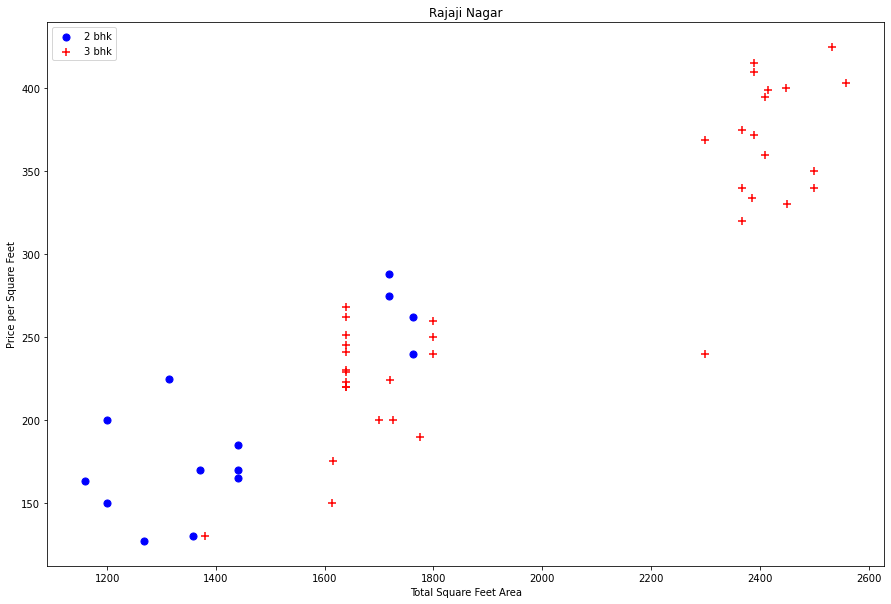

In [88]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location == location) & (df.BHK == 2)]
    bhk3 = df[(df.location == location) & (df.BHK == 3)]
    
    matplotlib.rcParams['figure.figsize'] = (15,10)
    
    plt.scatter(bhk2.total_sqft,bhk2.price,color = 'blue',label='2 bhk',s = 50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker = '+',color = 'red',label='3 bhk',s = 50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price per Square Feet")
    plt.title(location)
    plt.legend()

plot_scatter_chart(df9,'Rajaji Nagar')

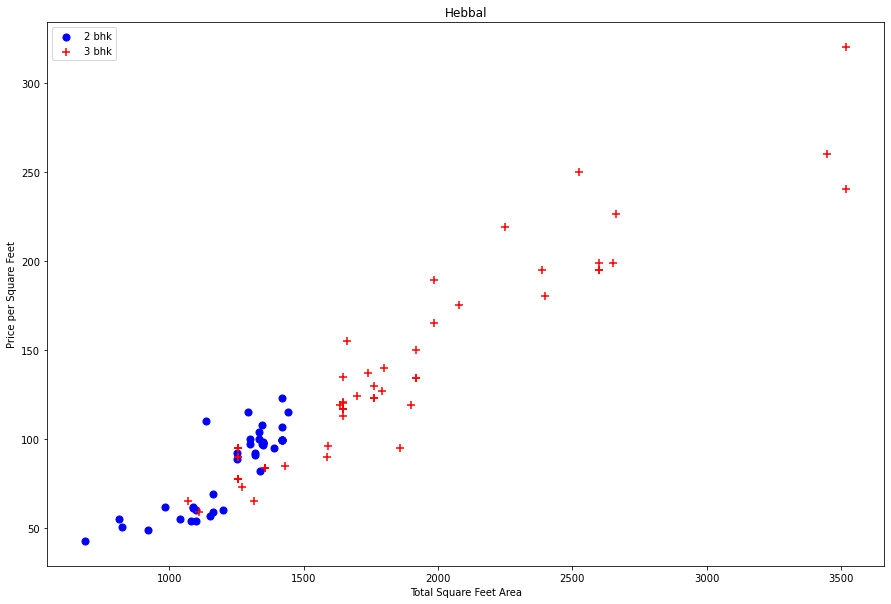

In [129]:
plot_scatter_chart(df9,'Hebbal')

In [90]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('BHK'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df10 = remove_bhk_outliers(df9)

df10.shape

(7353, 7)

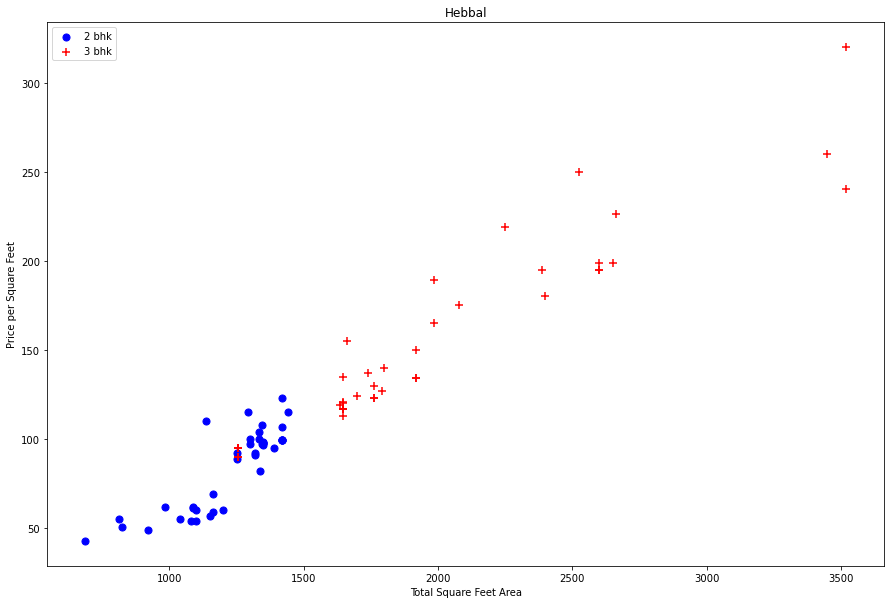

In [92]:
plot_scatter_chart(df10,'Hebbal')

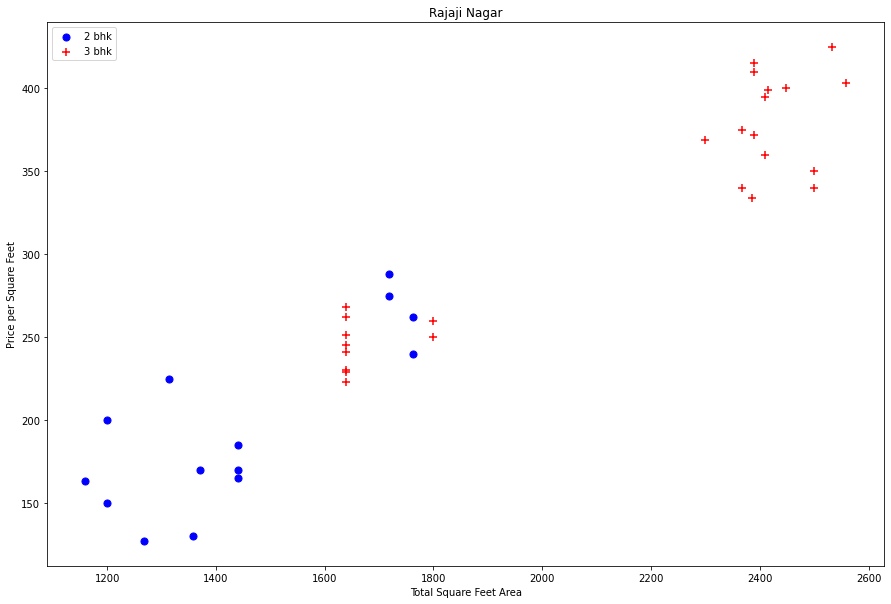

In [93]:
plot_scatter_chart(df10,'Rajaji Nagar')

Text(0, 0.5, 'Count')

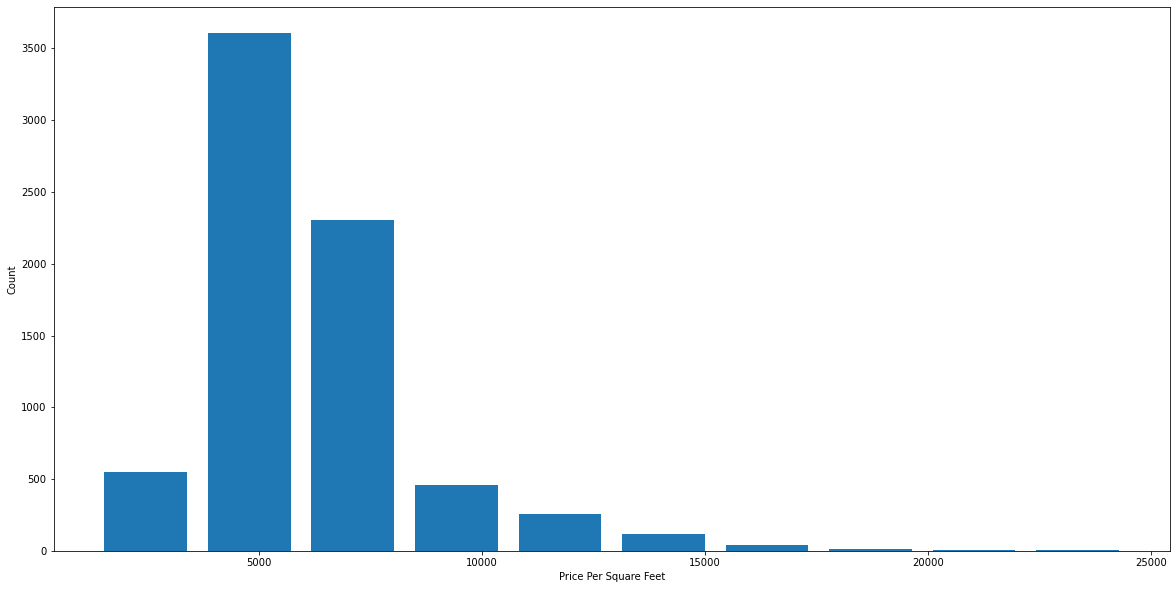

In [94]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df10.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [95]:
df10.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [96]:
df10[df10.bath > 10]

,location,size,total_sqft,bath,price,BHK,price_per_sqft
5306,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8530,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8619,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9352,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9683,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'Count')

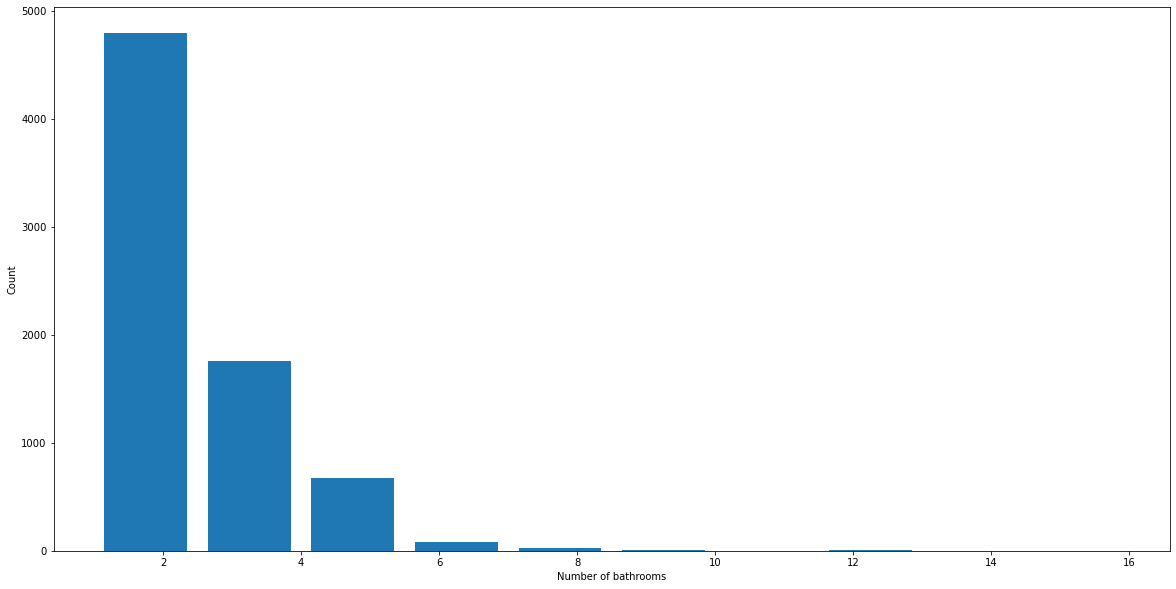

In [97]:
plt.hist(df10.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [100]:
df10[df10.bath>df10.BHK+2]

,location,size,total_sqft,bath,price,BHK,price_per_sqft
1634,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5267,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6748,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8455,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [101]:
df11 = df10[df10.bath<df10.BHK+2]
df11.shape

(7275, 7)

In [102]:
df11.head(10)

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668
5,1st Block Jayanagar,4 BHK,2750.0,4.0,413.0,4,15018.181818
6,1st Block Jayanagar,4 BHK,2450.0,4.0,368.0,4,15020.408163
8,1st Phase JP Nagar,3 BHK,1875.0,3.0,167.0,3,8906.666667
9,1st Phase JP Nagar,5 Bedroom,1500.0,5.0,85.0,5,5666.666667
10,1st Phase JP Nagar,3 BHK,2065.0,4.0,210.0,3,10169.491525


In [104]:
df12 = df11.drop(['size','price_per_sqft'],axis='columns')
df12.head(10)

,location,total_sqft,bath,price,BHK
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2
5,1st Block Jayanagar,2750.0,4.0,413.0,4
6,1st Block Jayanagar,2450.0,4.0,368.0,4
8,1st Phase JP Nagar,1875.0,3.0,167.0,3
9,1st Phase JP Nagar,1500.0,5.0,85.0,5
10,1st Phase JP Nagar,2065.0,4.0,210.0,3


In [106]:
dummies = pd.get_dummies(df12.location)
dummies.head(10)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [110]:
df13 = pd.concat([df12,dummies.drop('other',axis='columns')],axis='columns')
df13.head()

,location,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [111]:
df14 = df13.drop('location',axis='columns')
df14.head(10)

,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2750.0,4.0,413.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2450.0,4.0,368.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1875.0,3.0,167.0,3,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1500.0,5.0,85.0,5,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,2065.0,4.0,210.0,3,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [112]:
df14.shape

(7275, 245)

In [114]:
X = df14.drop(['price'],axis='columns')
X.head(10)

,total_sqft,bath,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2750.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2450.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1875.0,3.0,3,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1500.0,5.0,5,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,2065.0,4.0,3,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [115]:
X.shape

(7275, 244)

In [117]:
y = df14.price
y.head(10)

0     428.0
1     194.0
2     235.0
3     130.0
4     148.0
5     413.0
6     368.0
8     167.0
9      85.0
10    210.0
Name: price, dtype: float64

In [118]:
len(y)

7275

In [119]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [120]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.830070272103943

In [122]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [123]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

83.51389235950514

In [124]:
predict_price('1st Phase JP Nagar',1000, 3, 3)

86.94235095260224

In [127]:
predict_price('Indira Nagar',1000, 2, 2)

186.02262141797257